# 2.3 Newton's method

Suppose $f\in C^{2}[a,b],$ i.e., $f,f',f''$ are continuous on $[a,b].$
Let $p_{0}$ be a "good" approximation to $p$ such that $f'(p_{0})\neq0$
and $|p-p_{0}|$ is "small". First Taylor polynomial for $f$
at $p_{0}$ with the remainder term is
\begin{equation*}
f(x)=f(p_{0})+(x-p_{0})f'(p_{0})+\frac{(x-p_{0})^{2}}{2!}f''(\xi(x))
\end{equation*}
where $\xi(x)$ is a number between $x$ and $p_{0}.$ Substitute
$x=p$ and note $f(p)=0$ to get:
\begin{equation*}
0=f(p_{0})+(p-p_{0})f'(p_{0})+\frac{(p-p_{0})^{2}}{2!}f''(\xi(p))
\end{equation*}
where $\xi(p)$ is a number between $p$ and $p_{0}.$ Rearrange the
equation to get
\begin{equation}\label{eq:Newton's iteration w error part 1}
p=p_{0}-\frac{f(p_{0})}{f'(p_{0})}-\frac{(p-p_{0})^{2}}{2}\frac{f''(\xi(p))}{f'(p_{0})}.
\end{equation}
If $|p-p_{0}|$ is "small" then $(p-p_{0})^{2}$ is even smaller,
and the error term can be dropped to obtain the following approximation:
\begin{equation*}
p\approx p_{0}-\frac{f(p_{0})}{f'(p_{0})}.
\end{equation*}
The idea in Newton's method is to set the next iterate, $p_{1}$,
to this approximation:
\begin{equation*}
p_{1}=p_{0}-\frac{f(p_{0})}{f'(p_{0})}.
\end{equation*}
Equation \eqref{eq:Newton's iteration w error part 1} can be written as
\begin{equation}\label{eq:Newton's iteration w error}
p=p_{1}-\frac{(p-p_{0})^{2}}{2}\frac{f''(\xi(p))}{f'(p_{0})}.
\end{equation}

**Summary:** Start with an initial approximation $p_{0}$ to $p$
and generate the sequence $\{p_{n}\}_{n=1}^{\infty}$ by
\begin{equation}\label{eq:eq_newton}
p_{n}=p_{n-1}-\frac{f(p_{n-1})}{f'(p_{n-1})},n\geq 1.
\end{equation}

This is called Newton's method.

**Graphical interpretation:** 

Start with $p_{0}.$ Draw the tangent line at $(p_{0},f(p_{0}))$
and approximate $p$ by the intercept $p_{1}$ of the line:
\begin{equation*}
f'(p_{0})=\frac{0-f(p_{0})}{p_{1}-p_{0}}\Rightarrow p_{1}-p_{0}=-\frac{f(p_{0})}{f'(p_{0})}\Rightarrow p_{1}=p_{0}-\frac{f(p_{0})}{f'(p_{0})}.
\end{equation*}
Now draw the tangent at $(p_{1},f(p_{1}))$ and continue.

\begin{remark}\label{rem:chap2_rem31}
\begin{itemize}

\item Clearly Newton's method will fail if $f'(p_{n})=0$ for some $n$.
Graphically this means the tangent line is parallel to the $x$-axis
so we cannot get the $x$-intercept.
\item Newton's method may fail to converge if the initial guess $p_{0}$
is not close to $p.$ In the following figure, either choice for $p_{0}$ results in a sequence that oscillates between two points.

![Non-converging behavior for Newton's method](images/Newton_div.png)
\item Newton's method requires $f'(x)$ is known explicitly.
\end{itemize}
\end{remark}

**Exercise 2.3-1**

Sketch the graph for $f(x)=x^2-1$. What are the roots of the equation $f(x)=0$?

a. Let $p_0=1/2$ and find the first two iterations $p_1,p_2$ of Newton's method by hand. Mark the iterates on the graph of $f$ you sketched. Do you think the iterates will converge to a zero of $f$?

b. Let $p_0=0$ and find $p_1$. What are your conclusions about the convergence of the iterates?

## Python code for Newton's method

The Python code below is based on Equation \eqref{eq:eq_newton}. The variable *pin* in the code corresponds to $p_{n-1}$, and $p$ corresponds to $p_n$. The code overwrites these variables as the iteration continues. Also notice that the code has two functions as inputs; $f$ and *fprime* (the derivative $f'$).

In [1]:
def newton(f, fprime, pin, eps, N):
    n = 1
    p = 0. # to ensure the value of p carries out of the while loop
    while n <= N:
        p = pin - f(pin)/fprime(pin)
        if np.isclose(f(p), 0) or np.abs(p-pin) < eps:
            print('p is ', p, ' and the iteration number is ', n)
            return
        pin = p
        n += 1
    y = f(p)
    print('Method did not converge. The last iteration gives ', 
          p, ' with function value ', y)

Let's apply Newton's method to find the root of \(f(x)=x^5+2x^3-5x-2\), a function we considered before. First, we plot the function.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

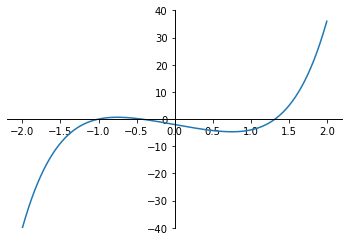

In [3]:
x = np.linspace(-2, 2, 1000)
y = x**5+2*x**3-5*x-2
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_position('center')
ax.set_ylim([-40, 40])
plt.plot(x,y);

 The derivative is $f'=5x^4+6x^2-5$. We set $\text{pin}=1$, $\text{eps}=\epsilon=10^{-4}$, and $N=20$, in the code.

In [4]:
newton(lambda x: x**5+2*x**3-5*x-2, lambda x: 5*x**4+6*x**2-5, 1, 1e-4, 20)

p is  1.3196411672093726  and the iteration number is  6


 Recall that the bisection method required 16 iterations to approximate
the root in $[0,2]$ as $p=1.31967$. (However, the stopping criterion
used in bisection and Newton's methods are slightly different.) 1.3196 is the rightmost root in the plot. But there are other roots of
the function. Let's run the code with pin = 0.


In [5]:
newton(lambda x: x**5+2*x**3-5*x-2, lambda x: 5*x**4+6*x**2-5, 0, 1e-4, 20)

p is  -0.43641313299799755  and the iteration number is  4


 Now we use pin = $-2.0$ which will give the leftmost root.

In [6]:
newton(lambda x: x**5+2*x**3-5*x-2, lambda x: 5*x**4+6*x**2-5, -2, 1e-4, 20)

p is  -1.0000000001014682  and the iteration number is  7


Below is a movie illustration of convergence of Newton's method.

In [7]:
import ipywidgets as widgets
from ipywidgets import interact, fixed
from IPython.display import display
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def newton_animation(f, fprime, pin, eps, N):
    n = 1
    p = pin # to ensure the value of p carries out of the while loop
    while n <= N:
        p = pin - f(pin)/fprime(pin)
        if np.isclose(f(p), 0) or np.abs(p-pin) < eps:
            return p
        pin = p
        n += 1
    return p

pin = -3
fig, ax = plt.subplots(figsize=(12,5))
def animate(i):
    ax.cla()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-50, 50)
    x = newton_animation(lambda x: x**5+2*x**3-5*x-2, lambda x: 5*x**4+6*x**2-5, pin, 1e-4, i)
    ax.plot(x, 0, 'o')
    xf = np.linspace(-10, 10, 1000)
    yf = xf**5+2*xf**3-5*xf-2
    yp = (5*x**4+6*x**2-5)*(xf-x) + (x**5+2*x**3-5*x-2)
    ax.plot(xf, yf, 'b')
    ax.plot(xf, yp, 'r')
    ax.legend(['Current estimate', 'f', "f'"])
    ax.axhline()
    ax.axvline()
    ax.set_title('Iteration step '+str(i))
plt.close()
anim = FuncAnimation(fig, animate, frames=20, interval=500)
HTML(anim.to_jshtml())

Below is a widget showing different convergence regions.

In [8]:
interact(newton, f=fixed(lambda x: x**5+2*x**3-5*x-2), fprime=fixed(lambda x: 5*x**4+6*x**2-5), 
         pin=widgets.FloatSlider(min=-10, max=10, interval=0.1, description='Initial guess'),
         eps=fixed(1e-4), N=fixed(200));

interactive(children=(FloatSlider(value=0.0, description='Initial guess', max=10.0, min=-10.0), Output()), _do…

\begin{theorem}\label{theo:chap2_thm32}
Let $f\in C^{2}[a,b]$ and assume
$f(p)=0,f'(p)\neq0$ for $p\in(a,b).$ If $p_{0}$ is chosen sufficiently
close to $p,$ then Newton's method generates a sequence that converges
to $p$ with
\begin{equation*}
\lim_{n\rightarrow\infty}\frac{p-p_{n+1}}{(p-p_{n})^{2}}=-\frac{f''(p)}{2f'(p)}.
\end{equation*}
\end{theorem}

\begin{proof}
Since $f'$ is continuous and $f'(p)\neq0,$ there exists an interval
$I=[p-\epsilon,p+\epsilon]$ on which $f'\neq0.$ Let

\begin{equation*}
M=\frac{\max_{x\in I}|f''(x)|}{2\min_{x\in I}|f'(x)|}.
\end{equation*}
Pick $p_{0}$ from the interval $I$ (which means $|p-p_{0}|\leq\epsilon$), sufficiently close to $p$ so that $M|p-p_{0}|<1.$ From Equation \eqref{eq:Newton's iteration w error}
we have:
\begin{equation}\label{eq:newtonpf}
|p-p_{1}|=\frac{|p-p_{0}||p-p_{0}|}{2}\left|\frac{f''(\xi(p))}{f'(p_{0})}\right|<|p-p_{0}||p-p_{0}|M<|p-p_{0}|\leq\epsilon.
\end{equation}
Multiply both sides of $|p-p_{1}|<|p-p_{0}|$ by $M$ to get $M|p-p_{1}|<M|p-p_{0}|<1.$
Therefore, we have obtained: $|p-p_{1}| < \epsilon$ and $M|p-p_{1}|<1.$ Repeating the same argument used in \eqref{eq:newtonpf} to $|p-p_2|$, we can show $|p-p_{2}|<\epsilon$ and
$M|p-p_{2}|<1.$ Therefore by induction $|p-p_{n}|<\epsilon$ and
$M|p-p_{n}|<1,$ for all $n.$ This implies that all the iterates
$p_{n}$ are in the interval $I$ so $f'(p_{n})$ is never zero in
Newton's iteration.

If we replace $p_{1}$ by $p_{n+1}$, and $p_{0}$ by $p_{n}$
in Equation \eqref{eq:Newton's iteration w error}, we get
\begin{equation}\label{eq:newtonpf2}
p-p_{n+1}=-\frac{(p-p_{n})^{2}}{2}\frac{f''(\xi(p))}{f'(p_{n})}.
\end{equation}

Here $\xi(p)$ is a number between $p$ and $p_{n}.$ Since $\xi(p)$
changes recursively with $n$, let's update our notation as: $\xi(p)=\xi_{n}.$
Then, Equation \eqref{eq:newtonpf2} implies
\begin{equation*}
|p-p_{n+1}|\leq M|p-p_{n}|^{2}\Rightarrow M|p-p_{n+1}|\leq\left(M|p-p_{n}|\right)^{2}.
\end{equation*}
Similarly, $|p-p_{n}|\leq M|p-p_{n-1}|^{2}$, or $M|p-p_{n}|\leq\left(M|p-p_{n-1}|\right)^{2}$,
and thus $M|p-p_{n+1}|\leq\left(M|p-p_{n-1}|\right)^{2^{2}}.$ By
induction, we can show
\begin{equation*}
M|p-p_{n}|\leq\left(M|p-p_{0}|\right)^{2^{n}}\Rightarrow|p-p_{n}|\leq\frac{1}{M}\left(M|p-p_{0}|\right)^{2^{n}}.
\end{equation*}
Since $M|p-p_{0}|<1,$ $|p-p_{n}|\rightarrow0$ as $n\rightarrow\infty.$
Therefore $\lim_{n\rightarrow\infty}p_{n}=p.$ Finally,
\begin{equation*}
\lim_{n\rightarrow\infty}\frac{p-p_{n+1}}{(p-p_{n})^{2}}=\lim_{n\rightarrow\infty}-\frac{1}{2}\frac{f''(\xi_{n})}{f'(p_{n})},
\end{equation*}
and since $p_{n}\rightarrow p,$ and $\xi_{n}$ is between $p_{n}$
and $p,$ $\xi_{n}\rightarrow p$, and therefore
\begin{equation*}
\lim_{n\rightarrow\infty}\frac{p-p_{n+1}}{(p-p_{n})^{2}}=-\frac{1}{2}\frac{f''(p)}{f'(p)}
\end{equation*}
proves the theorem.
\end{proof}

\begin{corollary}\label{cor:chap2_cor33}
Newton's method has quadratic convergence.
\end{corollary}

\begin{proof}
Newton's method has quadratic convergence.
Recall that quadratic convergence means
\begin{equation*}
|p_{n+1}-p| \leq C |p_n-p|^2,
\end{equation*}
for some constant $C>0$. Taking the absolute values of the limit established in the previous theorem, we obtain
\begin{equation*}
\lim_{n\rightarrow\infty}\left | \frac{p-p_{n+1}}{(p-p_{n})^{2}} \right |= \lim_{n\rightarrow\infty} \frac{|p_{n+1}-p|}{|p_{n}-p|^{2}}=\left | \frac{1}{2}\frac{f''(p)}{f'(p)} \right |.
\end{equation*}
Let $C'=\left | \frac{1}{2}\frac{f''(p)}{f'(p)} \right |$. From the definition of limit of a sequence, for any $\epsilon>0$, there exists an integer $N>0$ such that $ \frac{|p_{n+1}-p|}{|p_{n}-p|^{2}}  <C'+\epsilon$ whenever $n>N.$ Set $C=C'+\epsilon$ to obtain $|p_{n+1}-p| \leq C |p_n-p|^2$ for $n>N$.
\end{proof}

\begin{example}\label{example:chap2_exa34}
The Black-Scholes-Merton (BSM) formula, for which Myron Scholes and Robert Merton were awarded the Nobel prize in economics in 1997, computes the fair price of a contract known as the **European call option**. This contract gives its owner the right to purchase the asset the contract is written on (for example, a stock), for a specific price denoted by $K$ and called the strike price (or exercise price), at a future time denoted by $T$ and called the expiry. The formula gives the value of the European call option, $C$, as

\begin{equation*}
C=S\phi(\mathbb{d_1})-Ke^{-rT}\phi(\mathbb{d_2})
\end{equation*}
where $S$ is the price of the asset at the present time, $r$ is the risk-free interest rate, and $\phi(x)$ is the distribution function of the standard normal random variable, given by
\begin{equation*}
\phi(x)=\frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^{-t^2/2}dt.
\end{equation*}
The constants $\mathbb{d_1},\mathbb{d_2}$ are obtained from
\begin{equation*}
\mathbb{d_1}=\frac{\log(S/K)+(r+\sigma^2/2)T}{\sigma \sqrt{T}}, \thinspace \mathbb{d_2}=\mathbb{d_1}-\sigma \sqrt{T}.
\end{equation*}
All the constants in the BSM formula can be observed, except for $\sigma$, which is called the volatility of the underlying asset. It has to be estimated from empirical data in some way. We want to concentrate on the relationship between $C$ and $\sigma$, and think of $C$ as a function of $\sigma$ only. We rewrite the BSM formula emphasizing $\sigma$:
\begin{equation*}
C(\color{red}{\sigma})=S\phi(\color{red}{\mathbb{d_1}})-Ke^{-rT}\phi(\color{red}{\mathbb{d_2}})
\end{equation*}
It may look like the independent variable $\sigma$ is missing on the right hand side of the above formula, but it is not: the constants $\mathbb{d_1},\mathbb{d_2}$ both depend on $\sigma$. We can also think about $\mathbb{d_1},\mathbb{d_2}$ as functions of $\sigma$.

There are two questions financial engineers are interested in:

- Compute the option price $C$ based on an estimate of $\sigma$
- Observe the price of an option $\hat{C}$ traded in the market, and find $\sigma^*$ for which the BSM formula gives the output $\hat{C}$, i.e, $C(\sigma^*)=\hat{C}$. The volatility $\sigma^*$ obtained in this way is called the **implied volatility**.


The second question can be answered using a root-finding method, in particular, Newton's method. To summarize, we want to solve the equation:
\begin{equation*}
C(\sigma)-\hat{C}=0
\end{equation*}
where $\hat{C}$ is a given constant, and
\begin{equation*}
C(\sigma)=S\phi(\mathbb{d_1})-Ke^{-rT}\phi(\mathbb{d_2}).
\end{equation*}
To use Newton's method, we need $C'(\sigma)=\frac{dC}{d\sigma}$. Since $\mathbb{d_1},\mathbb{d_2}$ are functions of $\sigma$, we have
\begin{equation}\label{eq:BSM_der}
\frac{dC}{d\sigma}=S\frac{d\phi(\mathbb{d_1})}{d\sigma} - K e^{-rT} \frac{d\phi(\mathbb{d_2})}{d\sigma}.
\end{equation}

Let's compute the derivatives on the right hand side of \eqref{eq:BSM_der}.
\begin{equation*}
\frac{d\phi(\mathbb{d_1})}{d\sigma}=\frac{d}{d\sigma} \left( \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\mathbb{d_1}} e^{-t^2/2} dt \right)=\frac{1}{\sqrt{2\pi}} \left( \frac{d}{d\sigma}\underbrace{ \int_{-\infty}^{\mathbb{d_1}} e^{-t^2/2} dt}_{u} \right).
\end{equation*}
We will use the chain rule to compute the derivative $\frac{d}{d\sigma}\underbrace{ \int_{-\infty}^{\mathbb{d_1}} e^{-t^2/2} dt}_{u}=\frac{du}{d\sigma}$:
\begin{equation*}
\frac{du}{d\sigma}=\frac{du}{d\mathbb{d_1}}\frac{d\mathbb{d_1}}{d\sigma}.
\end{equation*}
The first derivative follows from the Fundamental Theorem of Calculus
\begin{equation*}
\frac{du}{d\mathbb{d_1}}=e^{-\mathbb{d_1}^2/2},
\end{equation*}
and the second derivative is an application of the quotient rule of differentiation
\begin{equation*}
\frac{d\mathbb{d_1}}{d\sigma}=\frac{d}{d\sigma}\left(\frac{\log(S/K)+(r+\sigma^2/2)T}{\sigma \sqrt{T}}\right)=\sqrt{T}-\frac{\log(S/K)+(r+\sigma^2/2)T}{\sigma^2 \sqrt{T}}.
\end{equation*}
Putting the pieces together, we have
\begin{equation*}
\frac{d\phi(\mathbb{d_1})}{d\sigma}=\frac{e^{-\mathbb{d_1}^2/2}}{\sqrt{2\pi}}  \left( \sqrt{T}-\frac{\log(S/K)+(r+\sigma^2/2)T}{\sigma^2 \sqrt{T}} \right).
\end{equation*}
Going back to the second derivative we need to compute in Equation \eqref{eq:BSM_der}, we have:
\begin{equation*}
\frac{d\phi(\mathbb{d_2})}{d\sigma}=\frac{1}{\sqrt{2\pi}} \left( \frac{d}{d\sigma} \int_{-\infty}^{\mathbb{d_2}} e^{-t^2/2} dt \right).
\end{equation*}
Using the chain rule and the Fundamental Theorem of Calculus we obtain
\begin{equation*}
\frac{d\phi(\mathbb{d_2})}{d\sigma}=\frac{e^{-\mathbb{d_2}^2/2}}{\sqrt{2\pi}}\frac{d\mathbb{d_2}}{d\sigma}.
\end{equation*}
Since $\mathbb{d_2}$ is defined as $\mathbb{d_2}=\mathbb{d_1}-\sigma \sqrt{T}$, we can express $d\mathbb{d_2}/d\sigma$ in terms of $d\mathbb{d_1}/d\sigma$ as:
\begin{equation*}
\frac{d\mathbb{d_2}}{d\sigma}= \frac{d\mathbb{d_1}}{d\sigma}-\sqrt{T}.
\end{equation*}
Finally, we have the derivative we need:
\begin{equation}\label{eq:call_deriv}
\frac{dC}{d\sigma}=\frac{Se^{-\frac{\mathbb{d_1}^2}{2}}}{\sqrt{2\pi}}  \left( \sqrt{T}-\frac{\log(\frac{S}{K})+(r+\frac{\sigma^2}{2})T}{\sigma^2 \sqrt{T}} \right)+ K \frac{e^{-(rT+\frac{\mathbb{d_2}^2}{2})} }{\sqrt{2\pi}} \left( \frac{\log(\frac{S}{K})+(r+\frac{\sigma^2}{2})T}{\sigma^2 \sqrt{T}} \right)
\end{equation}
\end{example}

We are ready to apply Newton's method to solve the equation $C(\sigma)-\hat{C}=0$. Now let's find some data.

The General Electric Company (GE) stock is $\$7.01$ on Dec 8, 2018, and a European call option on this stock, expiring on Dec 14, 2018, is priced at $\$0.10$. The option has strike price $K=\$7.5$. The risk-free interest rate is 2.25\%. The expiry $T$ is measured in years, and since there are 252 trading days in a year, $T=6/252$. We put this information in Python:

In [9]:
S = 7.01
K = 7.5
r = 0.0225
T = 6/252

We have not discussed how to compute the distribution function of the standard normal random variable $\phi(x)=\frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^{-t^2/2}dt$. In Chapter 5, we will discuss how to compute integrals numerically, but for this example, we will use the built-in function Python has for $\phi(x)$. It is in a subpackage of SciPy called **stats**:

In [10]:
from scipy import stats

The following defines **stdnormal** as the standard normal random variable.

In [11]:
stdnormal = stats.norm(loc=0, scale=1)

The member function **cdf**(x) of **stdnormal** computes the standard normal distribution function at $x$. We write a function **phi**(x) based on this member function, matching our notation $\phi(x)$ for the distribution function.

In [12]:
phi = lambda x: stdnormal.cdf(x)

Next we define $C(\sigma)$ and $C'(\sigma)$. In the Python code, we replace $\sigma$ by $x$.

In [13]:
def c(x):
    d1 = (np.log(S/K)+(r+x**2/2)*T) / (x*np.sqrt(T))
    d2 = d1 - x*np.sqrt(T)
    return S*phi(d1) - K*np.exp(-r*T)*phi(d2)

The function **cprime**(x) is based on equation \eqref{eq:call_deriv}:

In [14]:
def cprime(x):
    d1 = (np.log(S/K)+(r+x**2/2)*T) / (x*np.sqrt(T))
    d2 = d1 - x*np.sqrt(T)
    A = (np.log(S/K)+(r+x**2/2)*T) / (np.sqrt(T)*x**2)
    return S*(np.exp(-d1**2/2) / np.sqrt(2*np.pi)) * (np.sqrt(T)-A) \
    + K*np.exp(-(r*T+d2**2/2)) * A / np.sqrt(2*np.pi)

We then load the **newton** function and run it to find the implied volatility which turns out to be 62\%.

In [15]:
newton(lambda x: c(x)-0.1, cprime, 1, 1e-4, 60)

p is  0.6231138483741047  and the iteration number is  3
